## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.322834 -0.958197  0.539386  0.320775 -0.868523 -0.592028
1  0.365947 -1.619292  0.849026  0.651326 -0.493181 -0.863730
2 -1.153847  0.537632  0.344191  1.363739  0.406686  0.382591
3  0.425716  1.428443 -0.012416 -1.691044 -0.123298 -0.547220
4 -1.581020 -0.835170  0.877545  0.260000 -1.525013 -1.391403


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0163860	total: 57.9ms	remaining: 57.8s
1:	learn: 1.0074421	total: 58.4ms	remaining: 29.2s
2:	learn: 0.9959754	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9861091	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9776096	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9671448	total: 60.4ms	remaining: 10s
6:	learn: 0.9567989	total: 60.9ms	remaining: 8.63s
7:	learn: 0.9468906	total: 61.4ms	remaining: 7.61s
8:	learn: 0.9381950	total: 61.9ms	remaining: 6.82s
9:	learn: 0.9276778	total: 62.5ms	remaining: 6.18s
10:	learn: 0.9201917	total: 62.9ms	remaining: 5.66s
11:	learn: 0.9107630	total: 63.4ms	remaining: 5.22s
12:	learn: 0.9002032	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8916144	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8842178	total: 65ms	remaining: 4.26s
15:	learn: 0.8749798	total: 65.5ms	remaining: 4.03s
16:	learn: 0.8672498	total: 65.9ms	remaining: 3.81s
17:	learn: 0.8592317	total: 66.4ms	remaining: 3.62s
18:	learn: 0.8489994	total: 66.8ms	remaining: 3.

109:	learn: 0.3705569	total: 108ms	remaining: 874ms
110:	learn: 0.3671400	total: 109ms	remaining: 870ms
111:	learn: 0.3641532	total: 109ms	remaining: 864ms
112:	learn: 0.3608656	total: 109ms	remaining: 859ms
113:	learn: 0.3576788	total: 110ms	remaining: 854ms
114:	learn: 0.3543251	total: 110ms	remaining: 849ms
115:	learn: 0.3513030	total: 111ms	remaining: 843ms
116:	learn: 0.3481984	total: 111ms	remaining: 839ms
117:	learn: 0.3453935	total: 112ms	remaining: 834ms
118:	learn: 0.3426844	total: 112ms	remaining: 830ms
119:	learn: 0.3403178	total: 113ms	remaining: 825ms
120:	learn: 0.3375422	total: 113ms	remaining: 821ms
121:	learn: 0.3342204	total: 113ms	remaining: 816ms
122:	learn: 0.3315110	total: 114ms	remaining: 813ms
123:	learn: 0.3287536	total: 114ms	remaining: 808ms
124:	learn: 0.3262138	total: 115ms	remaining: 804ms
125:	learn: 0.3237353	total: 115ms	remaining: 800ms
126:	learn: 0.3212095	total: 116ms	remaining: 797ms
127:	learn: 0.3190570	total: 116ms	remaining: 793ms
128:	learn: 

272:	learn: 0.1142901	total: 187ms	remaining: 498ms
273:	learn: 0.1134905	total: 187ms	remaining: 497ms
274:	learn: 0.1127771	total: 188ms	remaining: 496ms
275:	learn: 0.1122716	total: 188ms	remaining: 494ms
276:	learn: 0.1115798	total: 189ms	remaining: 493ms
277:	learn: 0.1108516	total: 189ms	remaining: 491ms
278:	learn: 0.1101780	total: 190ms	remaining: 490ms
279:	learn: 0.1095121	total: 190ms	remaining: 489ms
280:	learn: 0.1087301	total: 191ms	remaining: 488ms
281:	learn: 0.1081617	total: 191ms	remaining: 487ms
282:	learn: 0.1076087	total: 192ms	remaining: 485ms
283:	learn: 0.1068677	total: 192ms	remaining: 484ms
284:	learn: 0.1061915	total: 192ms	remaining: 483ms
285:	learn: 0.1055639	total: 193ms	remaining: 482ms
286:	learn: 0.1048872	total: 193ms	remaining: 480ms
287:	learn: 0.1042466	total: 194ms	remaining: 479ms
288:	learn: 0.1035802	total: 194ms	remaining: 478ms
289:	learn: 0.1029957	total: 195ms	remaining: 477ms
290:	learn: 0.1024093	total: 195ms	remaining: 475ms
291:	learn: 

490:	learn: 0.0372073	total: 292ms	remaining: 302ms
491:	learn: 0.0371167	total: 292ms	remaining: 302ms
492:	learn: 0.0369157	total: 293ms	remaining: 301ms
493:	learn: 0.0368669	total: 293ms	remaining: 300ms
494:	learn: 0.0368187	total: 294ms	remaining: 300ms
495:	learn: 0.0366517	total: 294ms	remaining: 299ms
496:	learn: 0.0366044	total: 294ms	remaining: 298ms
497:	learn: 0.0365383	total: 295ms	remaining: 297ms
498:	learn: 0.0364921	total: 295ms	remaining: 297ms
499:	learn: 0.0363284	total: 296ms	remaining: 296ms
500:	learn: 0.0362830	total: 296ms	remaining: 295ms
501:	learn: 0.0361481	total: 297ms	remaining: 294ms
502:	learn: 0.0359621	total: 297ms	remaining: 294ms
503:	learn: 0.0358989	total: 298ms	remaining: 293ms
504:	learn: 0.0358429	total: 298ms	remaining: 292ms
505:	learn: 0.0357116	total: 299ms	remaining: 292ms
506:	learn: 0.0355549	total: 299ms	remaining: 291ms
507:	learn: 0.0354753	total: 300ms	remaining: 290ms
508:	learn: 0.0354208	total: 300ms	remaining: 289ms
509:	learn: 

652:	learn: 0.0202988	total: 370ms	remaining: 197ms
653:	learn: 0.0201985	total: 371ms	remaining: 196ms
654:	learn: 0.0201111	total: 372ms	remaining: 196ms
655:	learn: 0.0200131	total: 372ms	remaining: 195ms
656:	learn: 0.0199277	total: 373ms	remaining: 195ms
657:	learn: 0.0198320	total: 373ms	remaining: 194ms
658:	learn: 0.0197484	total: 374ms	remaining: 193ms
659:	learn: 0.0196550	total: 374ms	remaining: 193ms
660:	learn: 0.0195733	total: 375ms	remaining: 192ms
661:	learn: 0.0194922	total: 375ms	remaining: 192ms
662:	learn: 0.0194043	total: 376ms	remaining: 191ms
663:	learn: 0.0193003	total: 376ms	remaining: 190ms
664:	learn: 0.0192147	total: 377ms	remaining: 190ms
665:	learn: 0.0191145	total: 377ms	remaining: 189ms
666:	learn: 0.0190248	total: 378ms	remaining: 189ms
667:	learn: 0.0189201	total: 378ms	remaining: 188ms
668:	learn: 0.0188180	total: 379ms	remaining: 187ms
669:	learn: 0.0187361	total: 379ms	remaining: 187ms
670:	learn: 0.0186375	total: 380ms	remaining: 186ms
671:	learn: 

857:	learn: 0.0089330	total: 476ms	remaining: 78.7ms
858:	learn: 0.0089016	total: 476ms	remaining: 78.1ms
859:	learn: 0.0088538	total: 477ms	remaining: 77.6ms
860:	learn: 0.0088064	total: 477ms	remaining: 77ms
861:	learn: 0.0087652	total: 477ms	remaining: 76.4ms
862:	learn: 0.0087384	total: 478ms	remaining: 75.9ms
863:	learn: 0.0086976	total: 479ms	remaining: 75.3ms
864:	learn: 0.0086706	total: 479ms	remaining: 74.7ms
865:	learn: 0.0086447	total: 479ms	remaining: 74.2ms
866:	learn: 0.0086187	total: 480ms	remaining: 73.6ms
867:	learn: 0.0085792	total: 480ms	remaining: 73ms
868:	learn: 0.0085556	total: 481ms	remaining: 72.5ms
869:	learn: 0.0085155	total: 481ms	remaining: 71.9ms
870:	learn: 0.0084907	total: 482ms	remaining: 71.4ms
871:	learn: 0.0084516	total: 482ms	remaining: 70.8ms
872:	learn: 0.0084261	total: 483ms	remaining: 70.2ms
873:	learn: 0.0084021	total: 483ms	remaining: 69.7ms
874:	learn: 0.0083640	total: 484ms	remaining: 69.1ms
875:	learn: 0.0083234	total: 484ms	remaining: 68.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

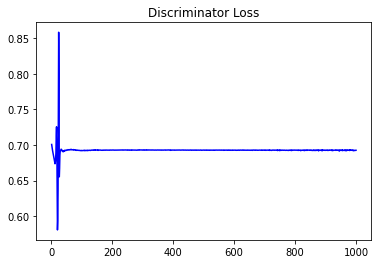

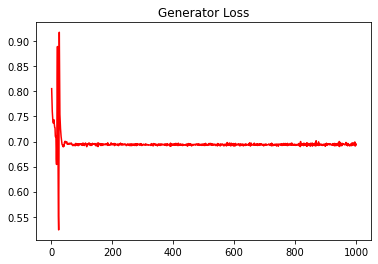

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07342342095502681


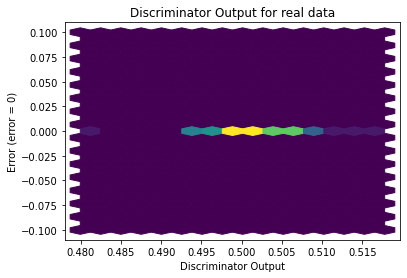

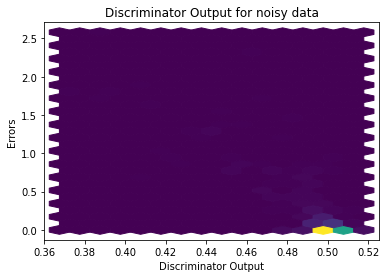

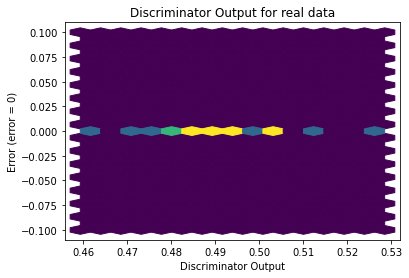

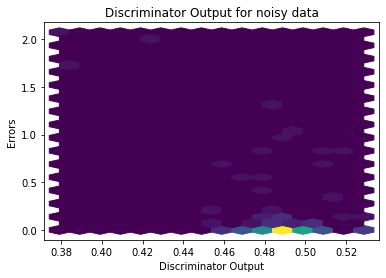

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


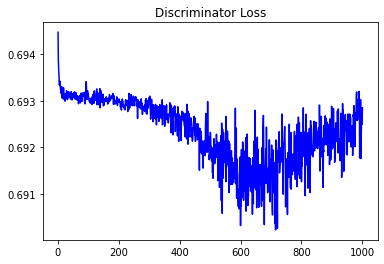

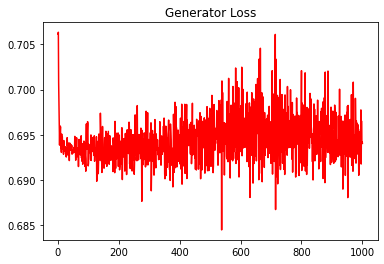

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11483924913148251


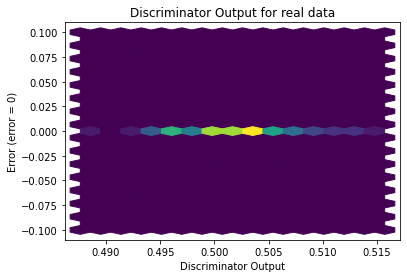

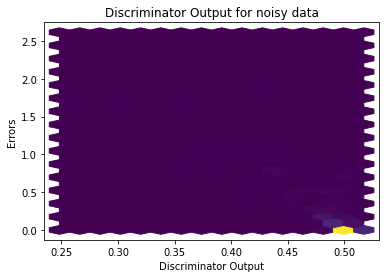

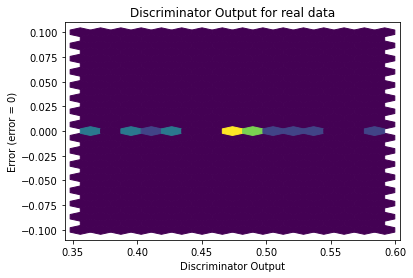

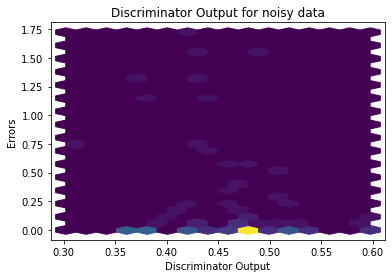

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2048]], requires_grad=True)
